In [18]:
import os,glob
import numpy as np
import scipy.io
import librosa
import sklearn.metrics
import torch

import matplotlib
import matplotlib.pylab as plt
from matplotlib import cm

import IPython.display as ipd

In [3]:
sr      = 16000
n_fft   = 640
n_shift = 160
n_mels  = 32

In [59]:
idx = 4
path_label = '/home/data/kbh/VADK/test_official/label/'+str(idx)+'.pt'
path_wav   = '/home/data/kbh/VADK/test_official/wav/'+str(idx)+'.wav'
wav,_ = librosa.load(path_wav,sr=16000)
label = torch.load(path_label)

In [60]:
print(np.shape(wav))
print(label.shape)

(160000,)
torch.Size([997])


(160000,)


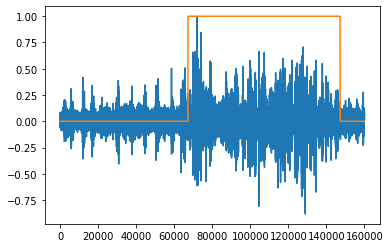

In [61]:
label_wav = np.zeros(len(wav))
print(np.shape(label_wav))
for i in range(0,len(label)) :
    if label[i]:
        label_wav[i*160:(i+1)*160]=1
plt.plot(wav)
plt.plot(label_wav)
plt.show()

In [62]:
vad_wav = np.zeros(len(wav))
for i in range(0,len(wav)):
    if label_wav[i]:
        vad_wav[i]=wav[i]
ipd.Audio(vad_wav, rate=sr)